## Table of Contents:
* [Data Loading and Description](#1)
* [Analysis of Numerical Data](#2)
* [Analysis of Categorical Data](#3)
* [Preprocessing Data](#4)
* [Backward Elimination](#5)
* [Linear Regression](#6)
* [Interpretation](#7)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import statsmodels.regression.linear_model as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

np.random.seed(42)
np.set_printoptions(precision=4, suppress=True)

sns.set_style('white')

### Data Loading and Description <a class="anchor" id="1"></a>

In [2]:
df_raw = pd.read_csv('laptops.csv')
df = df_raw.copy()
df.head()

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,63,intel,core i3,2,4,8,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990,67,intel,core i7,4,8,16,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100,73,amd,ryzen 5,6,12,8,...,No secondary storage,0,amd,dedicated,False,15.6,1920,1080,windows,1
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990,62,intel,core i5,12,16,8,...,No secondary storage,0,intel,integrated,False,14.0,1920,1080,windows,1
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580,62,amd,ryzen 3,4,8,8,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1


In [3]:
df.shape

(991, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       991 non-null    int64  
 1   brand                       991 non-null    object 
 2   Model                       991 non-null    object 
 3   Price                       991 non-null    int64  
 4   Rating                      991 non-null    int64  
 5   processor_brand             991 non-null    object 
 6   processor_tier              991 non-null    object 
 7   num_cores                   991 non-null    int64  
 8   num_threads                 991 non-null    int64  
 9   ram_memory                  991 non-null    int64  
 10  primary_storage_type        991 non-null    object 
 11  primary_storage_capacity    991 non-null    int64  
 12  secondary_storage_type      991 non-null    object 
 13  secondary_storage_capacity  991 non

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,991.0,505.860747,287.899458,1.0,258.5,507.0,754.5,1002.0
Price,991.0,77266.504541,57384.910269,9800.0,43595.0,61900.0,89245.0,454490.0
Rating,991.0,63.931382,10.190575,24.0,58.0,64.0,71.0,89.0
num_cores,991.0,8.128153,4.215499,2.0,6.0,8.0,10.0,24.0
num_threads,991.0,12.191726,5.585115,0.0,8.0,12.0,16.0,32.0
ram_memory,991.0,13.047427,5.591188,2.0,8.0,16.0,16.0,36.0
primary_storage_capacity,991.0,610.938446,266.927666,32.0,512.0,512.0,512.0,2048.0
secondary_storage_capacity,991.0,4.004036,33.553936,0.0,0.0,0.0,0.0,512.0
display_size,991.0,15.171241,0.938089,10.1,14.0,15.6,15.6,18.0
resolution_width,991.0,2003.503532,361.965292,1080.0,1920.0,1920.0,1920.0,3840.0


In [6]:
df.duplicated().sum()

0

In [7]:
df.nunique()

index                         991
brand                          26
Model                         991
Price                         545
Rating                         54
processor_brand                 4
processor_tier                 15
num_cores                      12
num_threads                    15
ram_memory                      7
primary_storage_type            2
primary_storage_capacity        7
secondary_storage_type          2
secondary_storage_capacity      4
gpu_brand                       5
gpu_type                        3
is_touch_screen                 2
display_size                   20
resolution_width               20
resolution_height              22
OS                              7
year_of_warranty                4
dtype: int64

#### The dataframe consists of 991 rows and 22 columns, comprising both numerical and categorical data. Upon initial inspection, there appear to be no erroneous data such as negative numerical or implausibly high hardware parameters. There are also no duplicate rows or empty cells detected within the dataset.

#### Set model as index and delete unnecessary "index" column

In [8]:
df = df.drop('index', axis=1)
df.set_index("Model", inplace = True)

***

### Analysis of Numerical Data <a class="anchor" id="2"></a>

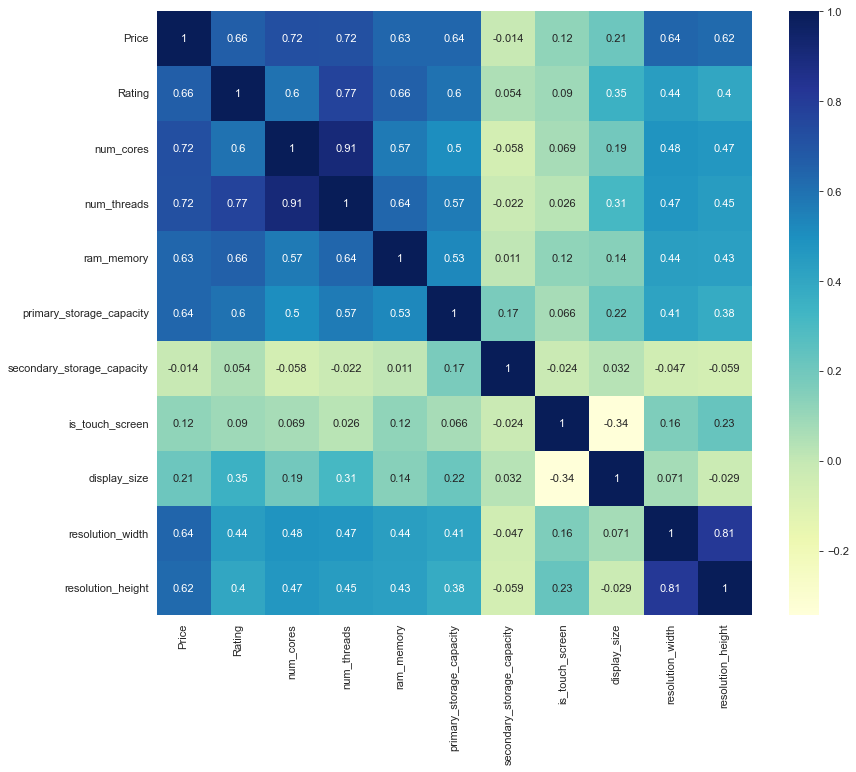

In [9]:
plt.figure(figsize=(12, 10), dpi=80)
sns.heatmap(data=df.corr(), annot=True, cmap="YlGnBu") 
plt.show()

#### I will exclude the 'secondary_storage_capacity' column from the dataset as it demonstrates no correlation with the product price.

In [10]:
df.drop(columns = ['secondary_storage_capacity'] , inplace=True)

#### To avoid multicollinearity, I retained only the most correlated parameter with price among the columns 'display_size', 'resolution_width', and 'resolution_height'.

#### Similarly, among the columns 'num_cores' and 'num_threads', I kept the more significant one, which is the number of cores.

In [11]:
df.drop(columns = ['display_size', 'resolution_height', 'num_threads'] , inplace=True)

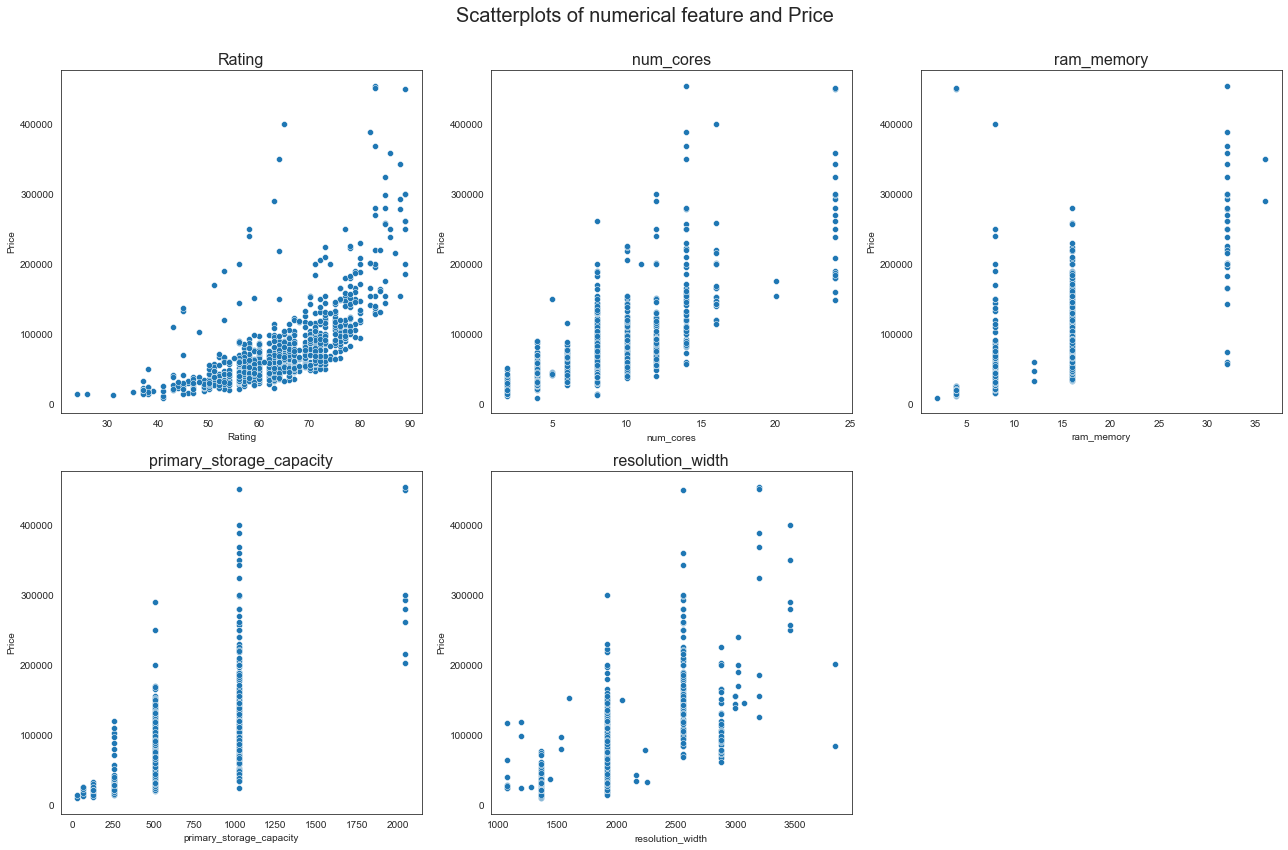

In [12]:
numerical_features = df.select_dtypes(include=[np.number]).columns

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.delaxes(ax[1][2])

for i, col in enumerate(numerical_features.drop('Price')):
    row = i // 3
    col_idx = i % 3
    

    sns.scatterplot(x=df[col], y=df['Price'], ax=ax[row, col_idx])
    
    ax[row, col_idx].set_title(f'{col}', fontsize=16)

plt.suptitle('Scatterplots of numerical feature and Price\n', fontsize=20)
plt.tight_layout()
plt.show()

#### Since most features exhibit a logarithmic relationship with price, I will apply a natural logarithm transformation to the label.

In [13]:
df['Price'] = np.log(df['Price'])
df = df.rename(columns={'Price':'log_Price'})

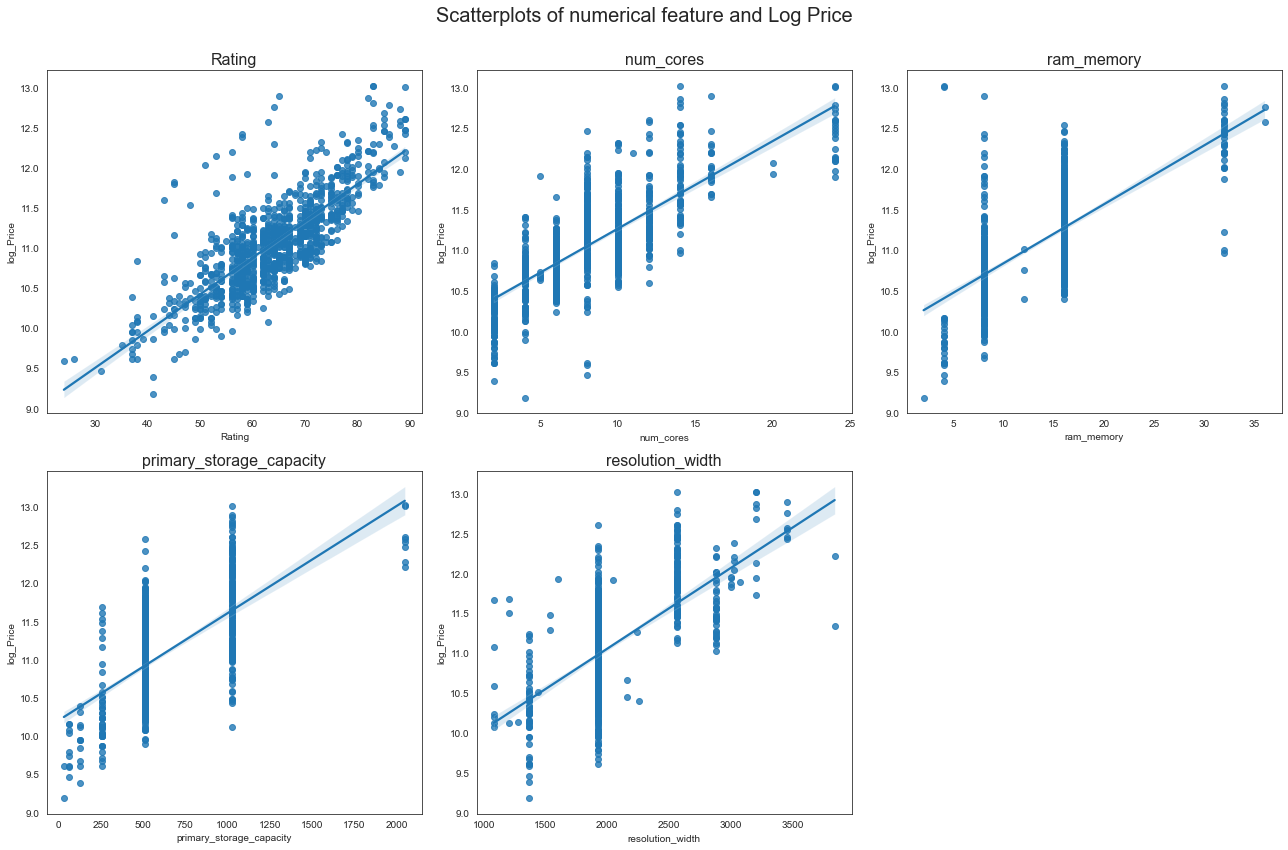

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.delaxes(ax[1][2])

for i, col in enumerate(numerical_features.drop('Price')):
    row = i // 3
    col_idx = i % 3
    

    sns.regplot(x=df[col], y=df['log_Price'], ax=ax[row, col_idx])
    
    ax[row, col_idx].set_title(f'{col}', fontsize=16)

plt.suptitle('Scatterplots of numerical feature and Log Price\n', fontsize=20)
plt.tight_layout()
plt.show()

***

### Analysis of Categorical Data <a class="anchor" id="3"></a>

In [15]:
categorical_features = [col for col in df.columns if df[col].dtype == 'O']


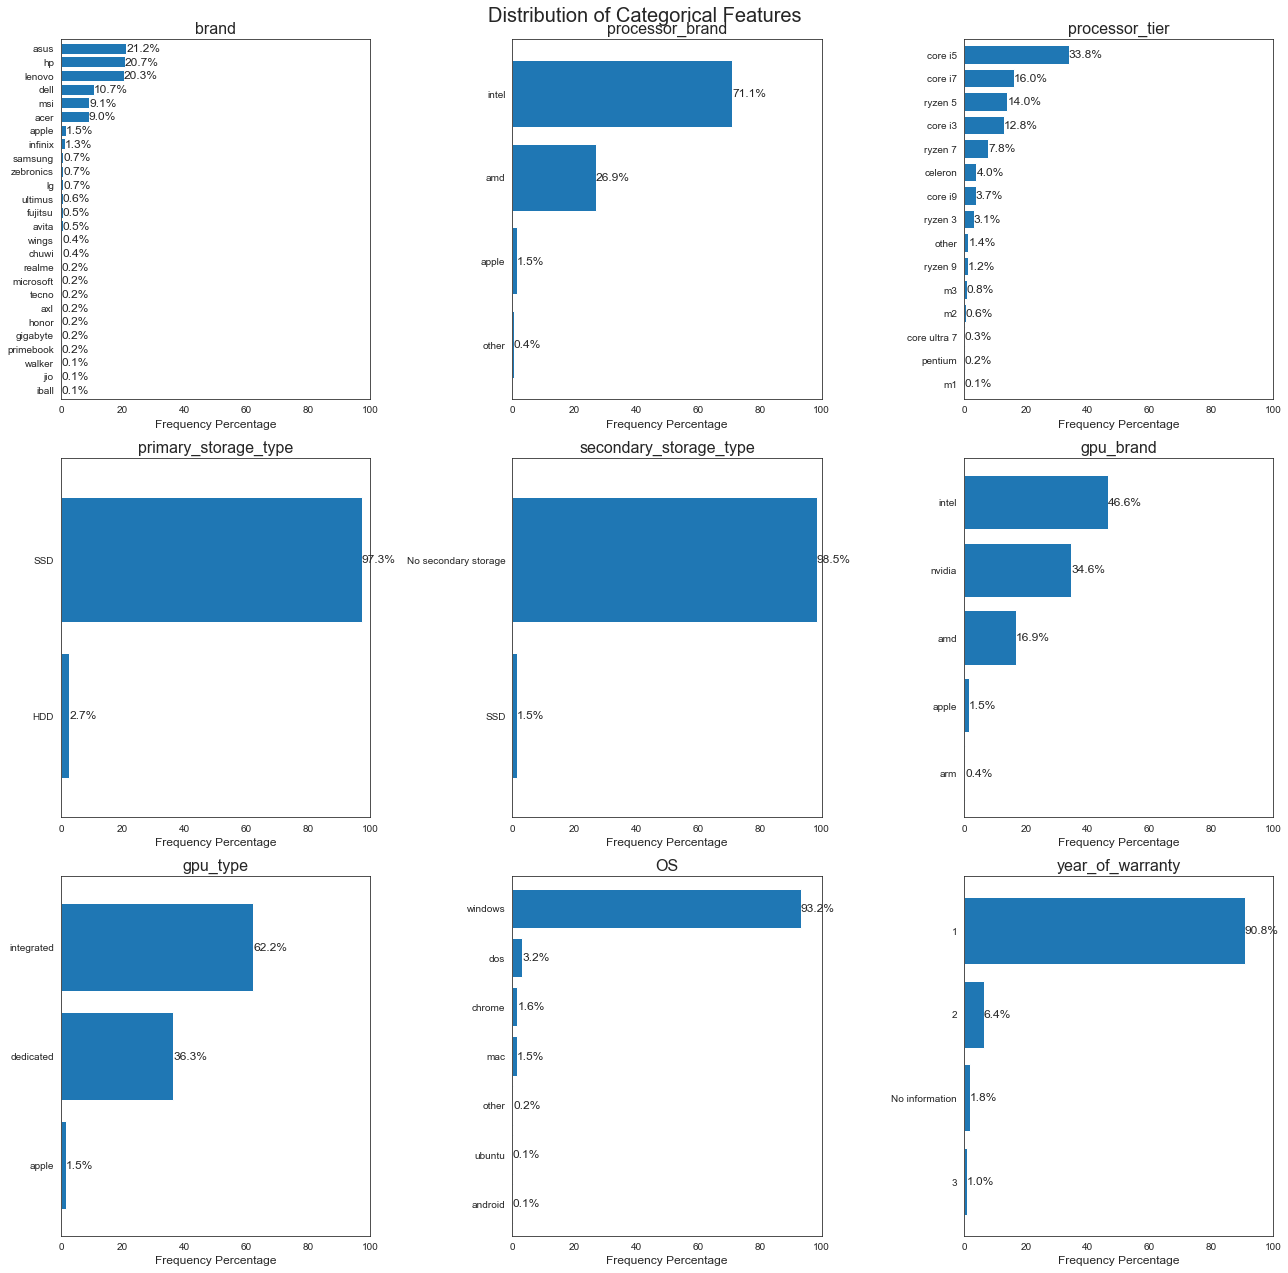

In [16]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))

for i, col in enumerate(categorical_features):
    row = i // 3
    col_idx = i % 3
    
    # Calculate frequency percentages
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()
    
    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8)
    
    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=12, va='center')
    
    ax[row, col_idx].set_xlim([0, 100])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=16)

plt.suptitle('Distribution of Categorical Features', fontsize=20)
plt.tight_layout()
plt.show()

#### Following our previous decision to discard the 'secondary_storage_capacity' column due to its lack of impact on the product price, we will also exclude the 'secondary_storage_type' column from the dataset. I also reject the "year_of_warranty" column due to the significant amount of "No information" value.

In [17]:
df.drop(columns = ['secondary_storage_type', 'year_of_warranty'] , inplace=True)

####  I will exclude brands of components with limited representation in the database, as they lack sufficient data for inclusion in the model. I will retain only Intel and AMD processors and processor tiers with more then 10 instances in the dataset.

In [18]:
df['processor_brand'].value_counts()

intel    705
amd      267
apple     15
other      4
Name: processor_brand, dtype: int64

In [19]:
df = df[df['processor_brand'].isin(['intel', 'amd'])]
df = df[df['processor_tier'].map(df['processor_tier'].value_counts()) > 10]

#### I will categorize the Operating System column into 'Windows' and 'other' categories, as the type of free OS should not affect the price.

In [20]:
df.loc[df['OS'] != 'windows', 'OS'] = 'other'

In [21]:
df['OS'].value_counts()

windows    911
other       46
Name: OS, dtype: int64

***

### Preprocessing Data <a class="anchor" id="4"></a>

In [22]:
df_dummies = pd.get_dummies(df, drop_first=True)

data = df_dummies.copy()
target = data.pop('log_Price')

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [23]:
# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_train = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
# X_test = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)

***

### Backward Elimination <a class="anchor" id="5"></a>

#### I've set the significance level to 0.05. In subsequent iterations, I'll reject the feature with the highest p-value if it exceeds this significance level.

In [24]:
sl = 0.05  # significance level
X_train['const'] = 1  # add constant column
ols = sm.OLS(endog = y_train, exog = X_train.astype(float)).fit()
max_pval = max(ols.pvalues.astype('float'))
discarded = []

while max_pval >= 0.05:
    pv_df = ols.pvalues.sort_values(ascending = False)
    X_train.drop(columns = [pv_df.index[0]], inplace=True)
    X_test.drop(columns = [pv_df.index[0]], inplace=True)
    discarded.append(pv_df.index[0])
    ols = sm.OLS(endog = y_train, exog = X_train.astype(float)).fit()
    max_pval = max(ols.pvalues.astype('float'))    
    
X_train.drop(columns = ['const'], inplace=True)  # drop constant column

In [25]:
print(f"Discarded features: {discarded}")

Discarded features: ['brand_realme', 'brand_honor', 'OS_windows', 'brand_msi', 'processor_tier_core i3', 'brand_fujitsu', 'brand_wings', 'brand_gigabyte', 'gpu_type_integrated', 'brand_walker']


In [26]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     236.9
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        08:17:17   Log-Likelihood:                 277.53
No. Observations:                 765   AIC:                            -493.1
Df Residuals:                     734   BIC:                            -349.2
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Rating                       0.0111      0.001      7.700      0.000       0.008       0.014
num_cores                    0.0317      0.003     11.687      0.000       0.026       0.037
ram_memory                   0.0141      0.002      8.250      0.000       0.011       0.017
primary_storage_capacity     0.0003   3.31e-05      8.290      0.000       0.000       0.000
is_touch_screen              0.2032      0.024      8.340      0.000       0.155       0.251
resolution_width             0.0002   2.35e-05      7.270      0.000       0.000       0.000
brand_asus                   0.0597      0.020      2.990      0.003       0.020       0.099
brand_avita                 -0.2816      0.089     -3.173      0.002      -0.456      -0.107
brand_axl                   -0.3906      0.175     -2.235      0.026      -0.734      -0.048
brand_chuwi                 -0.2688      0.124     -2.162      0.031      -0.513      -0.025
brand_dell                   0.1764      0.024      7.347      0.000       0.129       0.224
brand_hp                     0.1384      0.020      6.841      0.000       0.099       0.178
brand_infinix               -0.3258      0.055     -5.914      0.000      -0.434      -0.218
brand_lenovo                 0.0946      0.020      4.651      0.000       0.055       0.134
brand_lg                     0.3373      0.069      4.876      0.000       0.201       0.473
brand_microsoft              0.4655      0.126      3.695      0.000       0.218       0.713
brand_samsung                0.1792      0.068      2.652      0.008       0.047       0.312
brand_tecno                 -0.4980      0.124     -4.018      0.000      -0.741      -0.255
brand_ultimus               -0.4475      0.073     -6.090      0.000      -0.592      -0.303
brand_zebronics             -0.3200      0.088     -3.635      0.000      -0.493      -0.147
processor_brand_intel        1.3435      0.028     48.321      0.000       1.289       1.398
processor_tier_core i5       0.1337      0.024      5.465      0.000       0.086       0.182
processor_tier_core i7       0.2980      0.033      8.952      0.000       0.233       0.363
processor_tier_core i9       0.3197      0.057      5.573      0.000       0.207       0.432
processor_tier_ryzen 3       1.3092      0.037     35.844      0.000       1.237       1.381
processor_tier_ryzen 5       1.5113      0.023     66.493      0.000       1.467       1.556
processor_tier_ryzen 7       1.6047      0.029     54.801      0.000       1.547       1.662
processor_tier_ryzen 9       1.7749      0.056     31.504      0.000       1.664       1.886
primary_storage_type_SSD     0.1018      0.045      2.284      0.023       0.014       0.189
gpu_brand_intel              0.1221      0.032      3.831      0.000       0.060       0.185
gpu_brand_nvid

***

### Linear Regression <a class="anchor" id="6"></a>

In [27]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(f'R2 score: {regressor.score(X_test, y_test):.4f}')

R2 score: 0.9138


#### The Linear Regression model achieves an impressive R2 score, indicating strong predictive performance in capturing the variance of the target variable.

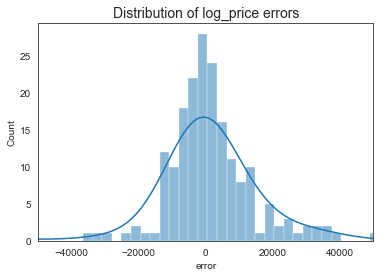

In [28]:
y_pred = regressor.predict(X_test)

y_true = y_test.copy()
predictions = pd.DataFrame(data={'y_true': np.exp(y_true), 'y_pred': np.exp(y_pred)})
predictions['error'] = predictions['y_true'] -  predictions['y_pred']


err = sns.histplot(predictions['error'], bins = 100, kde=True)
err.set_title('Distribution of log_price errors', fontdict={'size': 14})
err.set(xlim=(-50000,50000))
plt.show()

#### The distribution of errors has the characteristics of a normal distribution,  suggesting that the model can be considered to be functioning correctly.

### Interpretation <a class="anchor" id="7"></a>

#### Ranking the coefficients of features affecting the logarithm of the laptop price from most positive to most negative:

In [29]:
pd.Series(data=regressor.coef_, index=X_train.columns).sort_values(ascending=False)

brand_microsoft             0.465484
brand_lg                    0.337271
processor_tier_core i9      0.319659
processor_tier_core i7      0.298027
gpu_brand_nvidia            0.283239
processor_tier_ryzen 9      0.266195
is_touch_screen             0.203169
brand_samsung               0.179211
brand_dell                  0.176415
brand_hp                    0.138360
processor_tier_core i5      0.133682
gpu_brand_intel             0.122063
primary_storage_type_SSD    0.101834
processor_tier_ryzen 7      0.095993
brand_lenovo                0.094570
brand_asus                  0.059669
num_cores                   0.031703
ram_memory                  0.014075
Rating                      0.011127
processor_tier_ryzen 5      0.002604
primary_storage_capacity    0.000274
resolution_width            0.000171
processor_brand_intel      -0.165229
processor_tier_ryzen 3     -0.199563
brand_chuwi                -0.268803
brand_avita                -0.281557
brand_zebronics            -0.319976
b

#### The intersection with the y-axis (log_Price):

In [30]:
regressor.intercept_

9.05233187896132

#### Since the logarithm of prices isn't a readable unit, I'll try to express the coefficients in a more understandable manner. According to this  <a href = 'https://library.virginia.edu/data/articles/interpreting-log-transformations-in-a-linear-model'>article</a>, we can determine the percentage change in the laptop price when increasing single variable by 1, assuming that the other variables are unchanged.

In [31]:
pd.DataFrame(index=X_train.columns, data = {
    'coef':regressor.coef_, 
    'exp_coef':np.exp(regressor.coef_), 
    'pct_change':np.exp(regressor.coef_)*100 - 100}
            ).sort_values('pct_change', ascending=False)

,coef,exp_coef,pct_change
brand_microsoft,0.465484,1.592785,59.278541
brand_lg,0.337271,1.401119,40.111875
processor_tier_core i9,0.319659,1.376659,37.665855
processor_tier_core i7,0.298027,1.347198,34.719767
gpu_brand_nvidia,0.283239,1.327422,32.742234
processor_tier_ryzen 9,0.266195,1.304989,30.498945
is_touch_screen,0.203169,1.225279,22.527939
brand_samsung,0.179211,1.196273,19.627347
brand_dell,0.176415,1.192933,19.293338
brand_hp,0.138360,1.148389,14.838856


#### Now, referring to the 'pct_change' column, we can observe that addition of a touchscreen correlates with an approximate 22.5% increase in the laptop price. Another instance is that by adding one core to the laptop processor, the price is projected to increase by 3.22%. 
#### Let's test this by creating an example laptop with 2 cores, and another one with 3 cores. Afterward, I'll compare the predicted prices to see if they has indeed increased by the expected amount.

In [32]:
example_laptops = pd.DataFrame(columns=X_test.columns)
example_laptops = pd.concat([example_laptops, pd.DataFrame([{'num_cores':2}, {'num_cores':3}])], ignore_index=True).fillna(0)
price1, price2 = np.exp(regressor.predict(example_laptops))
print(price2/price1*100 - 100)

3.2211215838974
